Fix the fn####
4. Use Python to generate a set of sinusoidal time series with an amplitude of 1, sampling rate of 20 sps, length of 51.15 s (i.e. make your time series 1024 points long to accommodate the FFT, `t = np.arange(0, 51.2, dt)`). For frequencies from 1 Hz to 19 Hz in increments of 1 Hz, calculate and plot the amplitude and phase spectra (using the `np.abs` and `np.atan2` functions) versus frequency. For each frequency, also plot the time series between 0 s and $2{\pi}$ s (`plt.xlim(0, 2*np.pi)`). Note that for this assignment it is easier to compute the natural frequency rather than the radial frequencies, i.e., `fn = [[0:(N/2-1)], [-N/2:-1]]*1/T`. Recall that the Python functions `np.sin` and `np.cos` accept arguments in radians, so multiply your natural frequencies by $2{\pi}$ to convert to radial frequency. For example, given `t`, the sinusoid at `f = 1 Hz` is `y = np.sin(2*np.pi*f*t)`.  
a) Explain why the amplitude and phase spectra for 1 Hz to 9 Hz look the way they do.  
b) How do the spectra for 5 Hz differ from the others between 1-9 Hz? Explain why.  
c) What do the spectra for 11 to 19 Hz look like? How do they compare to those from 1 to 9 Hz? Explain.  
d) What happens to the spectrum at 10 Hz? Try comparing 10 Hz signals with phases zero (cosine) and 90° (sine). What do you see and why do you see it?

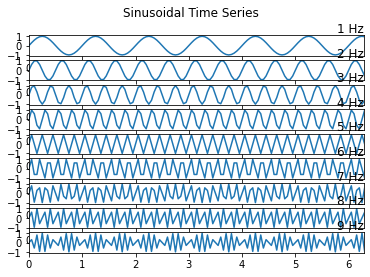

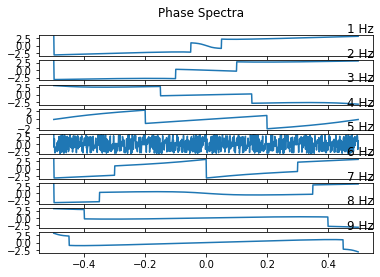

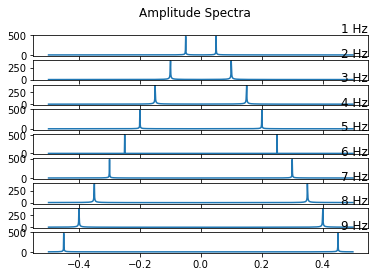

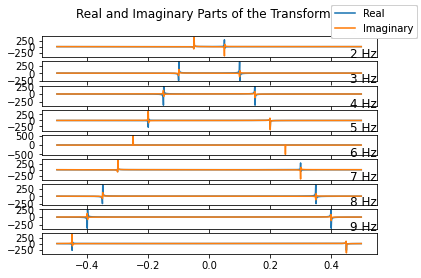

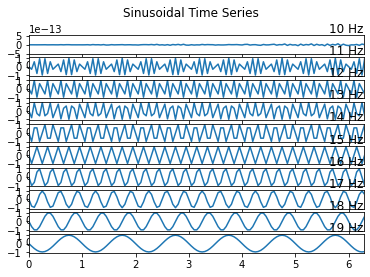

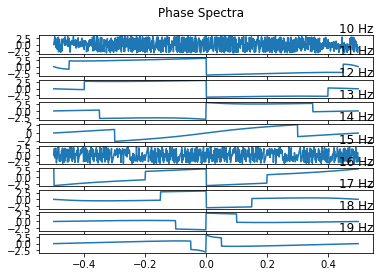

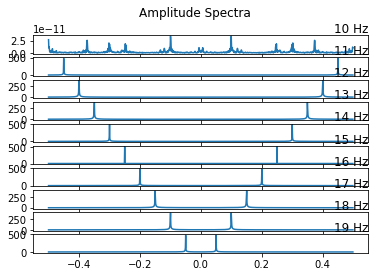

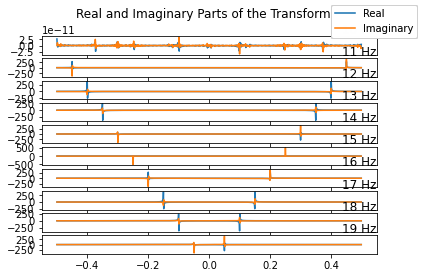

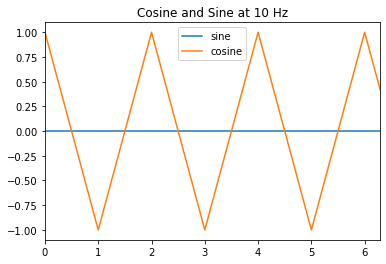

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 1024
dt = 1/20
t = np.arange(0, 51.2, dt)
fn = np.fft.fftfreq(N)

# the first 9 plots, for questions a, b
fig1, plots1 = plt.subplots(9)
fig2, phases1 = plt.subplots(9)
fig3, amps1 = plt.subplots(9)
fig4, realAndImag1 = plt.subplots(9)

for freq in range(1, 10):
    index = freq-1
    plot = np.sin(2 * np.pi * freq * t)
    fftplot = np.fft.fft(plot)

    plots1[index].plot(t, plot)
    plots1[index].set_title(str(freq) + " Hz", None, 'right', 1)
    fig1.suptitle("Sinusoidal Time Series")
    plots1[index].set_xlim([0, (2*np.pi)])
    phases1[index].plot(np.fft.fftshift(fn), np.fft.fftshift(np.arctan2(np.imag(fftplot), np.real(fftplot))))
    phases1[index].set_title(str(freq) + " Hz", None, 'right', 1)
    fig2.suptitle("Phase Spectra")
    amps1[index].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(fftplot)))
    amps1[index].set_title(str(freq) + " Hz", None, 'right', 1)
    fig3.suptitle("Amplitude Spectra")
    realAndImag1[index].plot(np.fft.fftshift(fn), np.fft.fftshift(np.real(fftplot)))
    realAndImag1[index].plot(np.fft.fftshift(fn), np.fft.fftshift(np.imag(fftplot)))
    realAndImag1[index].set_title(str(freq) + " Hz", None, 'right', 1)
    fig4.suptitle("Real and Imaginary Parts of the Transform")
    fig4.legend(["Real", "Imaginary"])

# plots 10-19 for question c
fig5, plots2 = plt.subplots(10)
fig6, phases2 = plt.subplots(10)
fig7, amps2 = plt.subplots(10)
fig8, realAndImag2 = plt.subplots(10)

for freq in range(10, 20):
    index = freq-10
    plot = np.sin(2 * np.pi * freq * t)
    fftplot = np.fft.fft(plot)

    plots2[index].plot(t, plot)
    plots2[index].set_title(str(freq) + " Hz", None, 'right', 1)
    fig5.suptitle("Sinusoidal Time Series")
    plots2[index].set_xlim([0, (2*np.pi)])
    phases2[index].plot(np.fft.fftshift(fn), np.fft.fftshift(np.arctan2(np.imag(fftplot), np.real(fftplot))))
    phases2[index].set_title(str(freq) + " Hz", None, 'right', 1)
    fig6.suptitle("Phase Spectra")
    amps2[index].plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(fftplot)))
    amps2[index].set_title(str(freq) + " Hz", None, 'right', 1)
    fig7.suptitle("Amplitude Spectra")
    realAndImag2[index].plot(np.fft.fftshift(fn), np.fft.fftshift(np.real(fftplot)))
    realAndImag2[index].plot(np.fft.fftshift(fn), np.fft.fftshift(np.imag(fftplot)))
    realAndImag2[index].set_title(str(freq) + " Hz", None, 'right', 1)
    fig8.suptitle("Real and Imaginary Parts of the Transform")
    fig8.legend(["Real", "Imaginary"])

plt.show()

# plots at 10 Hz for sine and cosine, for question 4d
sineplot = np.sin(2 * np.pi * 10 * t)
cosineplot = np.sin(2 * np.pi * 10 * t + (np.pi/2))

plt.plot(sineplot)
plt.plot(cosineplot)
plt.xlim(0, 2*np.pi)
plt.title("Cosine and Sine at 10 Hz")
plt.legend(["sine", "cosine"])
plt.show()